<a href="https://colab.research.google.com/github/mishrark0145/datamining/blob/main/Data_Mining_Lab08_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Reading Data

In [ ]:
#importing the data set
diabetes_data=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Many columns in the give data have 0's as their values, so the data has to be cleaned and processed.


The below cell shows how many zeros are present in each feature

In [ ]:
(diabetes_data[:]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
(diabetes_data[:]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<b>Splitting the dataset into training(60%), validation(20%) and test data(20%)

In [ ]:
train_data, test_data, validation_data  = np.split( diabetes_data.sample(frac=1,random_state=69), [int(.6*len(diabetes_data)), int(.8*len(diabetes_data))])

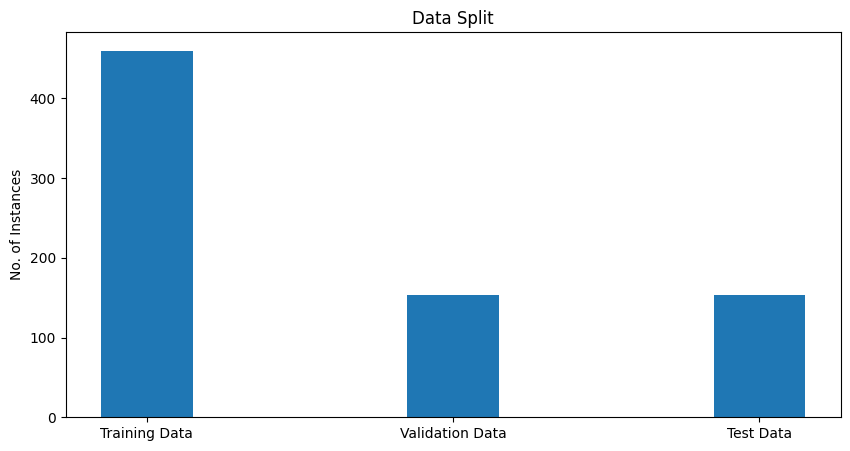

In [ ]:
data = {'Training Data':len(train_data), 'Validation Data':len(validation_data), 'Test Data':len(test_data)}
Data_split = list(data.keys())
accuracy_split = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(Data_split, accuracy_split,
        width = 0.3)
plt.ylabel("No. of Instances")
plt.title("Data Split")
plt.show()

In [ ]:
import math
train_data_mean=train_data.copy()
validation_data_mean=validation_data.copy()
test_data_mean=test_data.copy()

mean_insulin=train_data_mean['Insulin'].mean()
mean_Glucose=train_data_mean['Glucose'].mean()
mean_BloodPressure=train_data_mean['BloodPressure'].mean()
mean_SkinThickness=train_data_mean['SkinThickness'].mean()
mean_BMI=train_data_mean['BMI'].mean()

train_data_mean.loc[train_data_mean['Insulin'] == 0, 'Insulin'] = mean_insulin
train_data_mean.loc[train_data_mean['Glucose'] == 0, 'Glucose'] = mean_Glucose
train_data_mean.loc[train_data_mean['BloodPressure'] == 0, 'BloodPressure'] = mean_BloodPressure
train_data_mean.loc[train_data_mean['SkinThickness'] == 0, 'SkinThickness'] = mean_SkinThickness
train_data_mean.loc[train_data_mean['BMI'] == 0, 'BMI'] = mean_BMI


validation_data_mean.loc[validation_data_mean['Insulin'] == 0, 'Insulin'] = mean_insulin
validation_data_mean.loc[validation_data_mean['Glucose'] == 0, 'Glucose'] = mean_Glucose
validation_data_mean.loc[validation_data_mean['BloodPressure'] == 0, 'BloodPressure'] = mean_BloodPressure
validation_data_mean.loc[validation_data_mean['SkinThickness'] == 0, 'SkinThickness'] = mean_SkinThickness
validation_data_mean.loc[validation_data_mean['BMI'] == 0, 'BMI'] = mean_BMI


test_data_mean.loc[test_data_mean['Insulin'] == 0, 'Insulin'] = mean_insulin
test_data_mean.loc[test_data_mean['Glucose'] == 0, 'Glucose'] = mean_Glucose
test_data_mean.loc[test_data_mean['BloodPressure'] == 0, 'BloodPressure'] = mean_BloodPressure
test_data_mean.loc[test_data_mean['SkinThickness'] == 0, 'SkinThickness'] = mean_SkinThickness
test_data_mean.loc[test_data_mean['BMI'] == 0, 'BMI'] = mean_BMI


In [ ]:
#Normalize
train_data_norm=train_data_mean.copy()
validation_data_norm=validation_data_mean.copy()
test_data_norm=test_data_mean.copy()
for i in train_data_norm.columns[:-1]:
    validation_data_norm[i]=(validation_data_norm[i]-train_data_norm[i].min())/(train_data_norm[i].max()-train_data_norm[i].min())
    test_data_norm[i]=(test_data_norm[i]-train_data_norm[i].min())/(train_data_norm[i].max()-train_data_norm[i].min())
    train_data_norm[i]=(train_data_norm[i]-train_data_norm[i].min())/(train_data_norm[i].max()-train_data_norm[i].min())

train_data_norm_X=train_data_norm.drop('Outcome',axis=1)
#train_data_norm_y=np.asmatrix(train_data_norm['Outcome'].values).T
train_data_norm_y=train_data_norm.iloc[:, -1]

validation_data_norm_X=validation_data_norm.drop('Outcome',axis=1)
validation_data_norm_y=validation_data_norm.iloc[:, -1]

test_data_norm_X=test_data_norm.drop('Outcome',axis=1)
test_data_norm_y=test_data_norm.iloc[:, -1]

In [ ]:
#Sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [ ]:
#cost function: log loss
def cost_func(y,z):
    return -sum((y*np.log(z))+((1-y)*np.log(1-z)))/len(y)


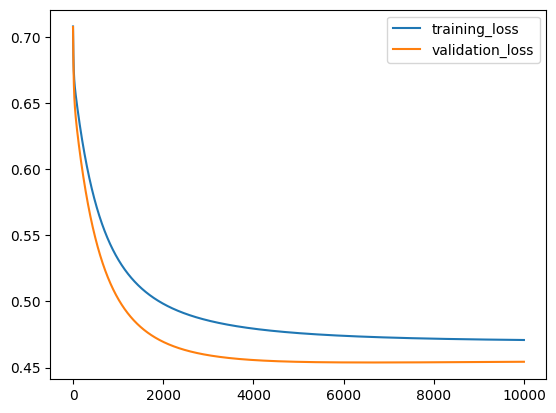

Plot to represent Training and Validation loss
 Training_loss   0.47080981600544153 
 Validation_loss   0.45435019504434193


In [ ]:
# LR
loss_stored=[]
loss_stored_val = []
learning_rate =0.1
weights=np.zeros(8)
cnst=0.1
for i in range(10000):
    z=np.dot(train_data_norm_X,weights)+cnst
    target_pred=sigmoid(z)
    loss=cost_func(train_data_norm_y,target_pred)
    gradient_weights=np.dot(train_data_norm_X.T,(target_pred-train_data_norm_y))/train_data_norm_X.shape[0]
    gradient_cnst=np.mean(target_pred-train_data_norm_y)
    weights=weights-learning_rate*gradient_weights
    cnst=cnst-learning_rate*gradient_cnst
    loss_stored.append(loss)

    z_val=np.dot(validation_data_norm_X,weights)+cnst
    target_pred_val=sigmoid(z_val)
    loss_val=cost_func(validation_data_norm_y,target_pred_val)
    loss_stored_val.append(loss_val)
plt.plot(loss_stored, label='training_loss')
plt.plot(loss_stored_val,label='validation_loss')
plt.legend()
plt.show()
print('Plot to represent Training and Validation loss')
print(" Training_loss  ",loss_stored[-1],"\n Validation_loss  ",loss_stored_val[-1])


<b>Functions to calculate accuracy

In [ ]:
def predict(X,w,c):
    for i in range (len(X)):
        r=sigmoid(np.dot(X,w)+c)
        y_predicted=[1 if i > 0.5 else 0 for i in r]
        return np.array(y_predicted)

def predicted_accuracy(actual_data_y,pred_data_y):
    prob=np.sum(actual_data_y==pred_data_y)/len(actual_data_y)
    return prob

<b>Testing the model with Test data</b>

In [ ]:
#Test data accuracy
y_predicted=predict(test_data_norm_X,weights,cnst)
test_accuracy=predicted_accuracy(test_data_norm_y,y_predicted)*100
print("Test data accuracy: ",test_accuracy)

Test data accuracy:  80.51948051948052


<b>Graphical representation of training, validation and test data accuracy.

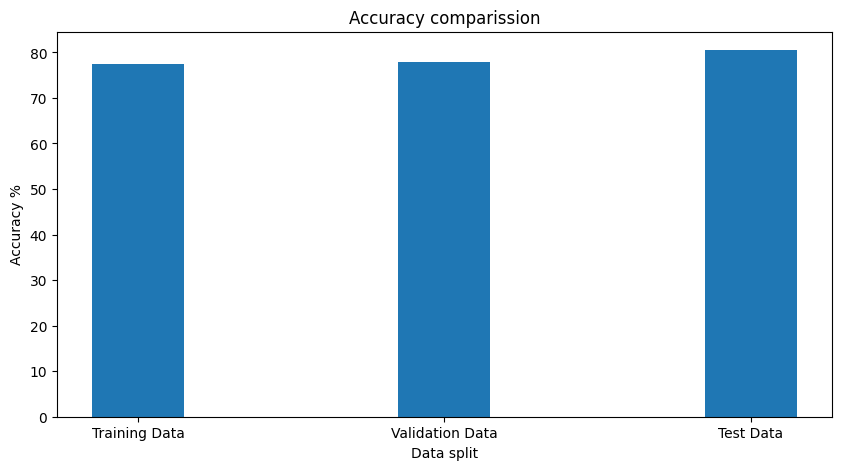

In [ ]:
data = {'Training Data':train_accuracy, 'Validation Data':validation_accuracy, 'Test Data':test_accuracy}
Data_split = list(data.keys())
accuracy_split = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(Data_split, accuracy_split,
        width = 0.3)
plt.xlabel("Data split")
plt.ylabel("Accuracy %")
plt.title("Accuracy comparission")
plt.show()

Accuracy: 0.8051948051948052
Precision: 0.7272727272727273
Recall: 0.64
F1-Score: 0.6808510638297872


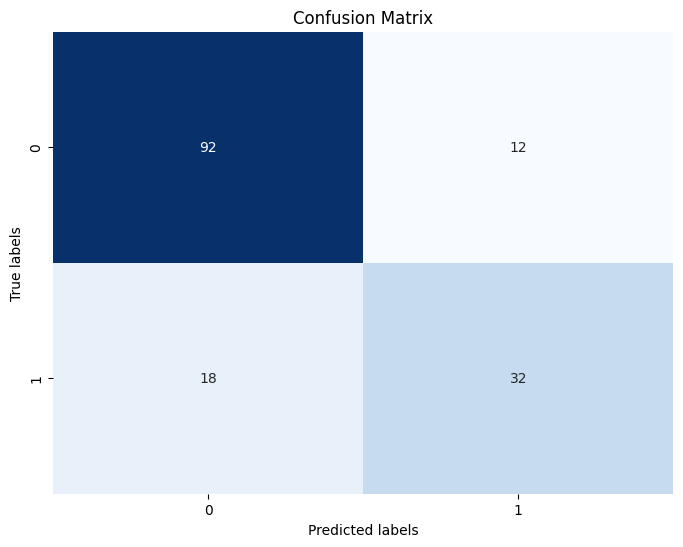

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(test_data_norm_y,y_predicted)

# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(test_data_norm_y,y_predicted)
precision = precision_score(test_data_norm_y,y_predicted)
recall = recall_score(test_data_norm_y,y_predicted)
f1 = f1_score(test_data_norm_y,y_predicted)

# Print accuracy, precision, recall, and f1-score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot confusion matrix in heatmap form
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
